# The Sparks Foundation - Graduate Rotational Internship Program (GRIP)

**Submission by Aravind Molugu**

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

- Java Script opensource code used, to generate the **Table of contents**. Credits **Keoni Mahelona**
- Mark the notebook as trusted, to view the **Table of contents**

In [126]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Problem Statement

Prediction using Supervised ML

    ● Predict the percentage of an student based on the no. of study hours.
    ● This is a simple linear regression task as it involves just 2 variables.
    ● Data can be found at http://bit.ly/w-data
    ● What will be predicted score if a student studies for 9.25 hrs/ day?

## Data Import and Basic checks

#### Importing the basic required libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Importing data and basic checks

In [3]:
source = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(source)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

- The DataFrame has just 2 variables and 25 entried (data points)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- All data available is non-null and thus no null value handling is required. 

In [117]:
data.describe()

,Hours,Scores,Minutes
count,25.000000,25.000000,25.000000
mean,5.012000,51.480000,300.720000
std,2.525094,25.286887,151.505643
min,1.100000,17.000000,66.000000
25%,2.700000,30.000000,162.000000
50%,4.800000,47.000000,288.000000
75%,7.400000,75.000000,444.000000
max,9.200000,95.000000,552.000000


## Exploratory Data Analysis (EDA)

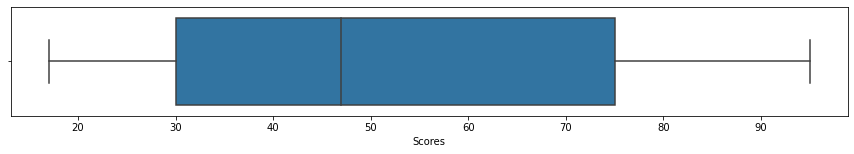

In [118]:
plt.figure(figsize = (15,2))
sns.boxplot(data.Scores)

- The Box plot shows that there are no outliers

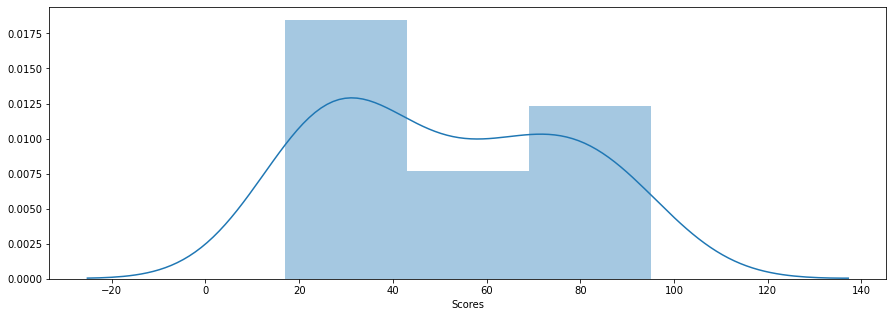

In [13]:
plt.figure(figsize = (15,5)) # Size of the figure
sns.distplot(data.Scores)

- The above dist plot show staht the dat is distributed with two peaks , one at about 35% and the other at about 80%

## Feature Engineering

We have a column for `Hours` studied. Using the Hours column, we will create a `Minutes` column to better analyse the data. 

In [14]:
data['Minutes']= 60*data.Hours
data.head()

,Hours,Scores,Minutes
0,2.5,21,150.0
1,5.1,47,306.0
2,3.2,27,192.0
3,8.5,75,510.0
4,3.5,30,210.0


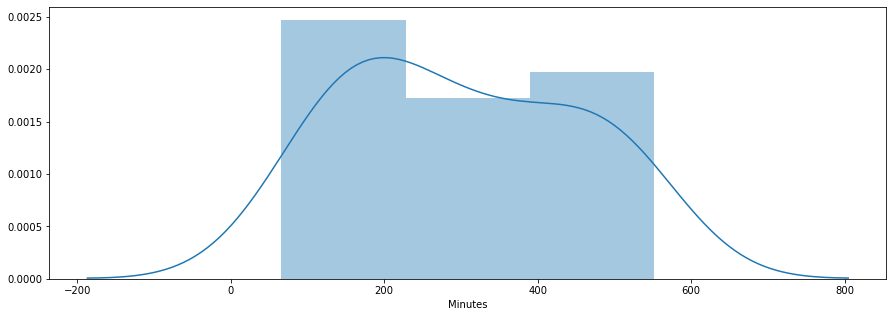

In [15]:
plt.figure(figsize = (15,5)) # Size of the figure
sns.distplot(data.Minutes)

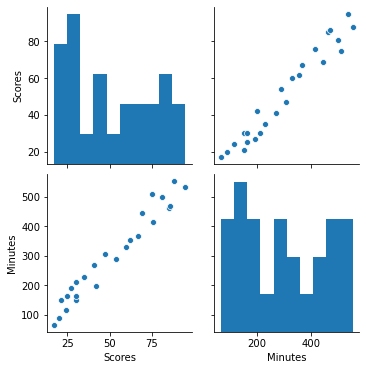

In [23]:
sns.pairplot(data[['Scores', 'Minutes']])

<Figure size 720x360 with 0 Axes>

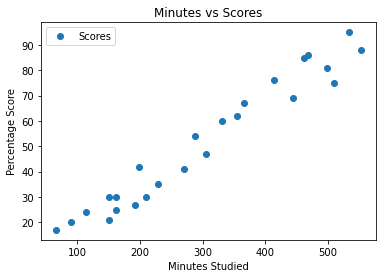

In [27]:
# Plotting the distribution of scores
plt.figure(figsize = (10,5)) # Size of the figure
data.plot(x='Minutes', y='Scores', style='o')  
plt.title('Minutes vs Scores')  
plt.xlabel('Minutes Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Based on the above pair plots and `Minutes vs Scores` scatter plot, we see a Linear corelation between `Minutes` and `Scores`. We will thus be using `Linear Regression` for this case

## Model Building

In [33]:
df = data[['Minutes', 'Scores']]
df.head()

,Minutes,Scores
0,150.0,21
1,306.0,47
2,192.0,27
3,510.0,75
4,210.0,30


### Test - Train Split

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [101]:
X = df.Minutes
y = df.Scores
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 100)
display(len(X_train))
display(len(X_test))

18

7

### Linear Regression using Stats Models API

In [102]:
import statsmodels.api as sm

# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [103]:
lr.params

const      1.870904
Minutes    0.164237
dtype: float64

In [105]:
display(lr.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     340.0
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           3.34e-12
Time:                        19:46:33   Log-Likelihood:                -56.304
No. Observations:                  18   AIC:                             116.6
Df Residuals:                      16   BIC:                             118.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8709      3.109      0.602      0.556      -4.719       8.461
Minutes        0.1642      0.009     18.438      0.000       0.145       0.183
==============================================================================
Omnibus:                        4.767   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                1.657
Skew:                          -0.293   Prob(JB):                        0.437
Kurtosis:                       1.634   Cond. No.                         786.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above Summary we can see that the `R-Squared` and `Adj. R-Squared`are around `95%`

**Using the `Constant` and `Minutes coeff` vaules to check how well the predicted line fits the Train data**

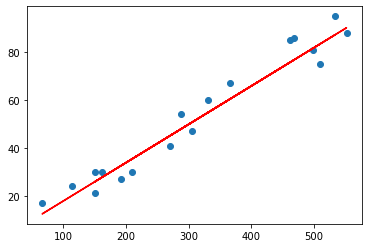

In [106]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.87 + 0.16*X_train, 'r')
plt.show()

## Residual Analysis

To validate assumptions of the model, and hence the reliability for inference

In [108]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

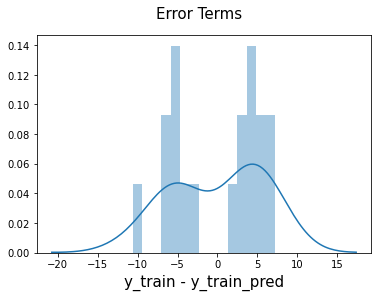

In [109]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

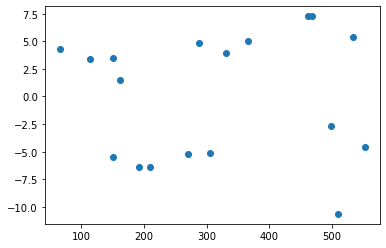

In [110]:
plt.scatter(X_train,res)
plt.show()

## Predictions on the Test Set

In [112]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [113]:
y_pred.head()

9     28.477237
22    39.316855
13    34.389756
11    60.010669
5     16.652200
dtype: float64

In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

4.999916451372885

In [115]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9403157736545141

The `R-Squared` value on the Test set is also `94%`, which is very good. 

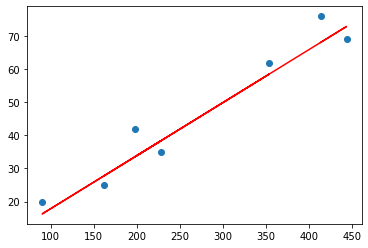

In [116]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 1.87 + 0.16* X_test, 'r')
plt.show()

**Using the `Constant` and `Minutes coeff` vaules to check how well the predicted line fits the Test data**

## The LR Model Equation

The equationwe get is as below

$ Score = 1.87 + 0.16* Minutes $

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [125]:
minutes = 9.25*60
score = 1.87 + 0.16* minutes
print(score)

90.67


- Hence as per our Linear Regression model, if a student studies for `9.25 hrs per day`, he is likely to score a percentage of `90.67`

****